In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score
from sklearn import metrics

In [3]:
df = pd.read_csv('wheat-seeds.txt',sep= ',')

In [4]:
df.head()

,area,perimeter,compactness,lengthofkernel,width,asymmetrycoeff,lengthofgroove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
df.shape

(210, 8)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
perimeter,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
compactness,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
lengthofkernel,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
width,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
asymmetrycoeff,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
lengthofgroove,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500
target,210.0,2.000000,0.818448,1.0000,1.00000,2.00000,3.000000,3.0000


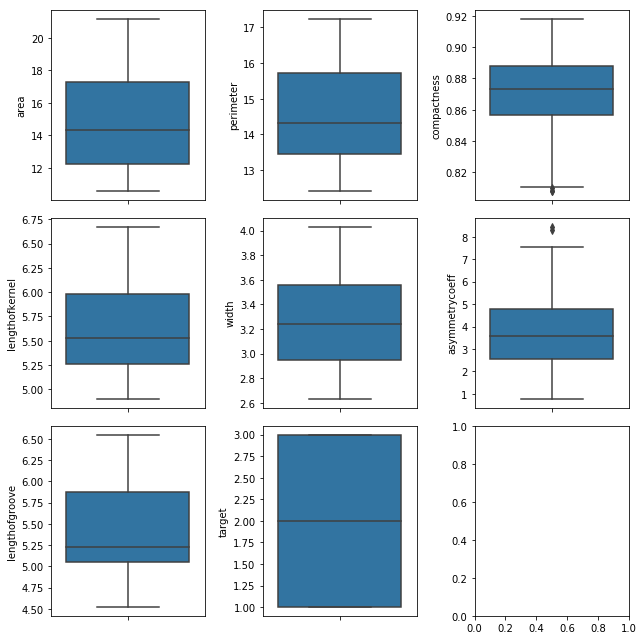

In [7]:
n_columns = 3
n_rows = 3
f,ax = plt.subplots(n_rows,n_columns,figsize = (3*n_columns,3*n_rows))
for i , c in enumerate(df.columns):
    sns.boxplot(y = c,data = df,ax = ax[i//n_columns, i%n_columns])
plt.tight_layout()
plt.show()

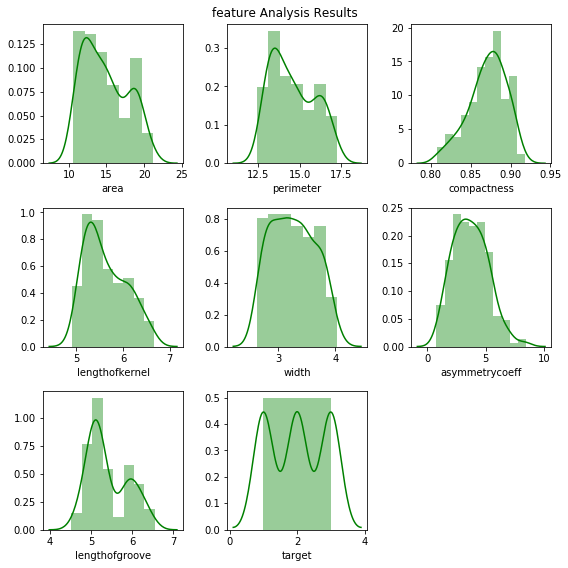

In [8]:
fig = plt.figure(figsize = (8, 8))
j = 0
for i in df:
    plt.subplot(3, 3, j+1)
    j += 1
    sns.distplot(df[i], color='g', label = 'malignant')
fig.suptitle('feature Analysis Results')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [9]:
df.isnull().sum()

area              0
perimeter         0
compactness       0
lengthofkernel    0
width             0
asymmetrycoeff    0
lengthofgroove    0
target            0
dtype: int64

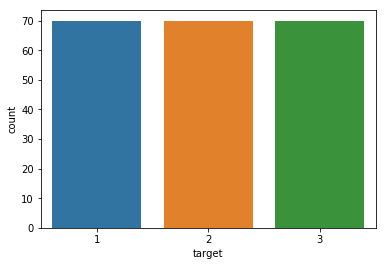

In [10]:
sns.countplot(df['target'])

In [26]:

#We are all set to split the data into train and test
X = df.drop('target', axis = 1)
y = df["target"]
X.head()




,area,perimeter,compactness,lengthofkernel,width,asymmetrycoeff,lengthofgroove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [12]:
#Lets use train_test_split to split X and y into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(147, 7) (63, 7) (147,) (63,)


## Model for Naivy_Base

In [13]:
from sklearn.naive_bayes import MultinomialNB

In [14]:
NavBas = MultinomialNB()


In [15]:
model_NB = NavBas.fit(X_train,y_train)

In [16]:
y_prob = model_NB.predict_proba(X_test)
y_pred = model_NB.predict(X_test)

In [17]:
metrics.confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[14,  2,  0],
       [10, 10,  1],
       [ 5,  0, 21]], dtype=int64)

In [18]:
print('accuracy',metrics.accuracy_score(y_test,y_pred))


accuracy 0.7142857142857143


Text(23.999999999999996, 0.5, 'True Value')

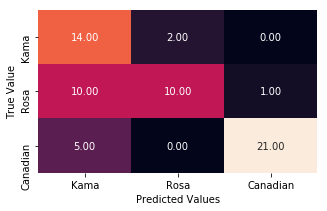

In [19]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (5,3))

sns.heatmap(cm,annot = True,fmt = '0.2f',xticklabels=['Kama', 'Rosa', 'Canadian'],
           yticklabels=['Kama', 'Rosa',  'Canadian'],cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Value')

In [20]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.48      0.88      0.62        16
           2       0.83      0.48      0.61        21
           3       0.95      0.81      0.88        26

    accuracy                           0.71        63
   macro avg       0.76      0.72      0.70        63
weighted avg       0.79      0.71      0.72        63



In [24]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [29]:
# Binarize the output
y = label_binarize(y, classes=[1, 2, 3])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(naive_bayes.MultinomialNB())
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

MemoryError: 

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [21]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

NameError: name 'n_classes' is not defined